In [1]:
import math
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_zillow_data()
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,taxamount
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27


In [3]:
df.shape

(28185, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28185 entries, 0 to 28184
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28185 non-null  int64  
 1   bathroomcnt                   28185 non-null  float64
 2   bedroomcnt                    28185 non-null  float64
 3   calculatedfinishedsquarefeet  28117 non-null  float64
 4   fips                          28185 non-null  float64
 5   yearbuilt                     28093 non-null  float64
 6   taxvaluedollarcnt             28184 non-null  float64
 7   taxamount                     28184 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [5]:
# check for number of unique values in each column
df.nunique()

parcelid                        28160
bathroomcnt                        20
bedroomcnt                         13
calculatedfinishedsquarefeet     4056
fips                                3
yearbuilt                         131
taxvaluedollarcnt               22786
taxamount                       27719
dtype: int64

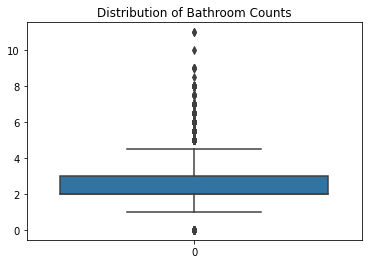

In [6]:
# quick viz of bathroomcnt
sns.boxplot(data=df.bathroomcnt)
plt.title('Distribution of Bathroom Counts')
plt.show()

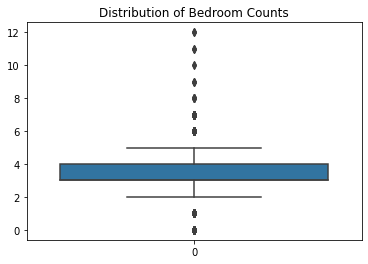

In [7]:
# quick viz of bedroomcnt
sns.boxplot(data=df.bedroomcnt)
plt.title('Distribution of Bedroom Counts')
plt.show()

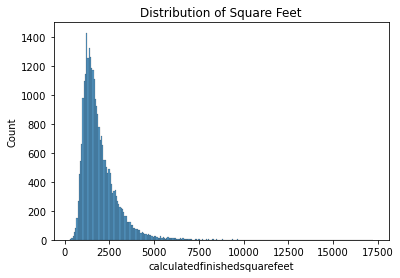

In [8]:
# quick viz of calculatedfinishedsquarefeet
sns.histplot(data=df.calculatedfinishedsquarefeet)
plt.title('Distribution of Square Feet')
plt.show()

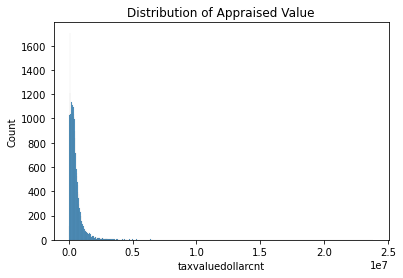

In [9]:
# quick viz of taxvaluedollarcnt
sns.histplot(data=df.taxvaluedollarcnt)
plt.title('Distribution of Appraised Value')
plt.show()

In [10]:
# set index to parcelid
df.set_index('parcelid', drop=True, inplace=True)
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,taxamount
parcelid,,,,,,,
11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48
11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90
11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69
14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72
11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27


In [11]:
prepare.miss_dup_values(df)

Your selected dataframe has 7 columns.
There are 4 columns that have missing values.
  
** There are 30 duplicate rows that represents 0.11% of total Values**


,Missing Values,% of Total Values
yearbuilt,92,0.3
calculatedfinishedsquarefeet,68,0.2
taxvaluedollarcnt,1,0.0
taxamount,1,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28185 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   28185 non-null  float64
 1   bedroomcnt                    28185 non-null  float64
 2   calculatedfinishedsquarefeet  28117 non-null  float64
 3   fips                          28185 non-null  float64
 4   yearbuilt                     28093 non-null  float64
 5   taxvaluedollarcnt             28184 non-null  float64
 6   taxamount                     28184 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [13]:
# drop any duplicates (removed 58 records)
df.drop_duplicates(keep=False, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28127 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   28127 non-null  float64
 1   bedroomcnt                    28127 non-null  float64
 2   calculatedfinishedsquarefeet  28062 non-null  float64
 3   fips                          28127 non-null  float64
 4   yearbuilt                     28038 non-null  float64
 5   taxvaluedollarcnt             28126 non-null  float64
 6   taxamount                     28126 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [14]:
prepare.miss_dup_values(df)

Your selected dataframe has 7 columns.
There are 4 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
yearbuilt,89,0.3
calculatedfinishedsquarefeet,65,0.2
taxvaluedollarcnt,1,0.0
taxamount,1,0.0


In [15]:
# replace symbols, etc with NaN's
df = df.replace(r'^\s*$', np.nan, regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28127 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   28127 non-null  float64
 1   bedroomcnt                    28127 non-null  float64
 2   calculatedfinishedsquarefeet  28062 non-null  float64
 3   fips                          28127 non-null  float64
 4   yearbuilt                     28038 non-null  float64
 5   taxvaluedollarcnt             28126 non-null  float64
 6   taxamount                     28126 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [16]:
# drop nulls (removed 94 records)
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28033 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   28033 non-null  float64
 1   bedroomcnt                    28033 non-null  float64
 2   calculatedfinishedsquarefeet  28033 non-null  float64
 3   fips                          28033 non-null  float64
 4   yearbuilt                     28033 non-null  float64
 5   taxvaluedollarcnt             28033 non-null  float64
 6   taxamount                     28033 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [17]:
prepare.miss_dup_values(df)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28033 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   28033 non-null  float64
 1   bedroomcnt                    28033 non-null  float64
 2   calculatedfinishedsquarefeet  28033 non-null  float64
 3   fips                          28033 non-null  float64
 4   yearbuilt                     28033 non-null  float64
 5   taxvaluedollarcnt             28033 non-null  float64
 6   taxamount                     28033 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [19]:
# rename columns
df = df.rename(columns={'parcelid': 'parcel_id', 'bathroomcnt': 'bathrooms', 'bedroomcnt': 'bedrooms',
                       'calculatedfinishedsquarefeet': 'square_feet', 'fips': 'county_code',
                       'yearbuilt': 'age', 'taxvaluedollarcnt': 'appraised_value', 'taxamount': 'taxes'})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28033 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28033 non-null  float64
 1   bedrooms         28033 non-null  float64
 2   square_feet      28033 non-null  float64
 3   county_code      28033 non-null  float64
 4   age              28033 non-null  float64
 5   appraised_value  28033 non-null  float64
 6   taxes            28033 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [21]:
# convert year built into age, age is better for evaluation
df.age = 2017 - df.age

In [22]:
df.head()

,bathrooms,bedrooms,square_feet,county_code,age,appraised_value,taxes
parcelid,,,,,,,
11721753,2.0,3.0,1316.0,6037.0,94.0,205123.0,2627.48
11289917,2.0,3.0,1458.0,6037.0,47.0,136104.0,2319.90
11705026,1.0,2.0,1421.0,6037.0,106.0,35606.0,543.69
14269464,3.0,4.0,2541.0,6059.0,14.0,880456.0,9819.72
11446756,2.0,3.0,1491.0,6037.0,62.0,107110.0,1399.27


In [23]:
# change data types from float to int
df.bathrooms = df.bathrooms.astype('int')
df.bedrooms = df.bedrooms.astype('int')
df.square_feet = df.square_feet.astype('int')
df.county_code = df.county_code.astype('int')
df.age = df.age.astype('int')
df.appraised_value = df.appraised_value.astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28033 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28033 non-null  int64  
 1   bedrooms         28033 non-null  int64  
 2   square_feet      28033 non-null  int64  
 3   county_code      28033 non-null  int64  
 4   age              28033 non-null  int64  
 5   appraised_value  28033 non-null  int64  
 6   taxes            28033 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.7 MB


In [25]:
df.square_feet.describe()

count    28033.000000
mean      1933.638533
std        991.830107
min        240.000000
25%       1279.000000
50%       1674.000000
75%       2324.000000
max      17245.000000
Name: square_feet, dtype: float64

In [26]:
# remove outliers from square_feet
# calculate 1QR and 3QR
q1sf, q3sf = df.square_feet.quantile([0.25, 0.75])
q1sf, q3sf

(1279.0, 2324.0)

In [27]:
# calculate IQR
iqrsf = q3sf - q1sf
iqrsf

1045.0

In [28]:
# calculate upper and lower bounds
uppersf = q3sf + (1.5 * iqrsf)
lowersf = q1sf - (1.5 * iqrsf)
uppersf, lowersf

(3891.5, -288.5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28033 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28033 non-null  int64  
 1   bedrooms         28033 non-null  int64  
 2   square_feet      28033 non-null  int64  
 3   county_code      28033 non-null  int64  
 4   age              28033 non-null  int64  
 5   appraised_value  28033 non-null  int64  
 6   taxes            28033 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.7 MB


In [30]:
# remove outliers if below or above the bounds (removed 1191 records)
df = df[df.square_feet > lowersf]
df = df[df.square_feet < uppersf]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26842 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        26842 non-null  int64  
 1   bedrooms         26842 non-null  int64  
 2   square_feet      26842 non-null  int64  
 3   county_code      26842 non-null  int64  
 4   age              26842 non-null  int64  
 5   appraised_value  26842 non-null  int64  
 6   taxes            26842 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [32]:
# remove outliers from appraised_value
# calculate 1QR and 3QR
q1av, q3av = df.appraised_value.quantile([0.25, 0.75])
q1av, q3av

(190985.0, 588498.0)

In [33]:
# calculate IQR
iqrav = q3av - q1av
iqrav

397513.0

In [34]:
# calculate upper and lower bounds
upperav = q3av + (1.5 * iqrav)
lowerav = q1av - (1.5 * iqrav)
upperav, lowerav

(1184767.5, -405284.5)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26842 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        26842 non-null  int64  
 1   bedrooms         26842 non-null  int64  
 2   square_feet      26842 non-null  int64  
 3   county_code      26842 non-null  int64  
 4   age              26842 non-null  int64  
 5   appraised_value  26842 non-null  int64  
 6   taxes            26842 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [36]:
# remove outliers if below or above the bounds (removed 1326 records)
df = df[df.appraised_value > lowerav]
df = df[df.appraised_value < upperav]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25516 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25516 non-null  int64  
 1   bedrooms         25516 non-null  int64  
 2   square_feet      25516 non-null  int64  
 3   county_code      25516 non-null  int64  
 4   age              25516 non-null  int64  
 5   appraised_value  25516 non-null  int64  
 6   taxes            25516 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [38]:
# remove outliers from bathrooms
# calculate 1QR and 3QR
q1bth, q3bth = df.bathrooms.quantile([0.25, 0.75])
q1bth, q3bth

(2.0, 3.0)

In [39]:
# calculate IQR
iqrbth = q3bth - q1bth
iqrbth

1.0

In [40]:
# calculate upper and lower bounds
upperbth = q3bth + (1.5 * iqrbth)
lowerbth = q1bth - (1.5 * iqrbth)
upperbth, lowerbth

(4.5, 0.5)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25516 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25516 non-null  int64  
 1   bedrooms         25516 non-null  int64  
 2   square_feet      25516 non-null  int64  
 3   county_code      25516 non-null  int64  
 4   age              25516 non-null  int64  
 5   appraised_value  25516 non-null  int64  
 6   taxes            25516 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [42]:
# remove outliers if below or above the bounds (removed 143 records)
df = df[df.bathrooms > lowerbth]
df = df[df.bathrooms < upperbth]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25373 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25373 non-null  int64  
 1   bedrooms         25373 non-null  int64  
 2   square_feet      25373 non-null  int64  
 3   county_code      25373 non-null  int64  
 4   age              25373 non-null  int64  
 5   appraised_value  25373 non-null  int64  
 6   taxes            25373 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.5 MB


In [44]:
# remove outliers from bedrooms
# calculate 1QR and 3QR
q1bd, q3bd = df.bedrooms.quantile([0.25, 0.75])
q1bd, q3bd

(3.0, 4.0)

In [45]:
# calculate IQR
iqrbd = q3bd - q1bd
iqrbd

1.0

In [46]:
# calculate upper and lower bounds
upperbd = q3bd + (1.5 * iqrbd)
lowerbd = q1bd - (1.5 * iqrbd)
upperbd, lowerbd

(5.5, 1.5)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25373 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25373 non-null  int64  
 1   bedrooms         25373 non-null  int64  
 2   square_feet      25373 non-null  int64  
 3   county_code      25373 non-null  int64  
 4   age              25373 non-null  int64  
 5   appraised_value  25373 non-null  int64  
 6   taxes            25373 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.5 MB


In [48]:
# remove outliers if below or above the bounds (removed 485 records)
df = df[df.bedrooms > lowerbd]
df = df[df.bedrooms < upperbd]

In [49]:
# last check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24888 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        24888 non-null  int64  
 1   bedrooms         24888 non-null  int64  
 2   square_feet      24888 non-null  int64  
 3   county_code      24888 non-null  int64  
 4   age              24888 non-null  int64  
 5   appraised_value  24888 non-null  int64  
 6   taxes            24888 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.5 MB


In [50]:
# going to drop columns not needed for project goals
mvp_df = df.drop(columns=['county_code', 'taxes'])
mvp_df.head()

,bathrooms,bedrooms,square_feet,age,appraised_value
parcelid,,,,,
11721753,2,3,1316,94,205123
11289917,2,3,1458,47,136104
11705026,1,2,1421,106,35606
14269464,3,4,2541,14,880456
11446756,2,3,1491,62,107110


In [51]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_zillow(mvp_df, 'appraised_value')
train.shape, validate.shape, test.shape

((13937, 5), (5973, 5), (4978, 5))

In [52]:
train.head()

,bathrooms,bedrooms,square_feet,age,appraised_value
parcelid,,,,,
12071196,2,3,1528,90,822304
14274491,2,3,1200,61,599000
12825849,2,3,1216,62,364079
12445221,3,3,2285,28,514602
17146152,3,4,2492,14,650523


In [53]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = prepare.Min_Max_Scaler(X_train, X_validate, X_test)
X_train_scaled.head()

,bathrooms,bedrooms,square_feet,age
parcelid,,,,
12071196,0.333333,0.333333,0.337262,0.651852
14274491,0.333333,0.333333,0.245230,0.437037
12825849,0.333333,0.333333,0.249719,0.444444
12445221,0.666667,0.333333,0.549663,0.192593
17146152,0.666667,0.666667,0.607744,0.088889


## Explore

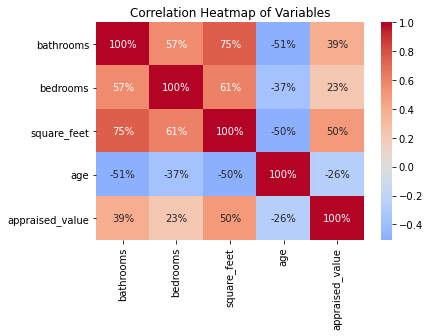

In [54]:
sns.heatmap(train.corr(), cmap='coolwarm', center=0, annot=True, fmt='.0%')
plt.title('Correlation Heatmap of Variables')
plt.show()

In [55]:
def plot_variable_pairs(train):
    '''
    This function will accept a dataframe as input 
    and plot all the pairwise relationships with the regression line for each pair
    '''
    sns.pairplot(train, kind = 'reg', corner=True,
                plot_kws = {'line_kws': {'color': 'crimson'}})

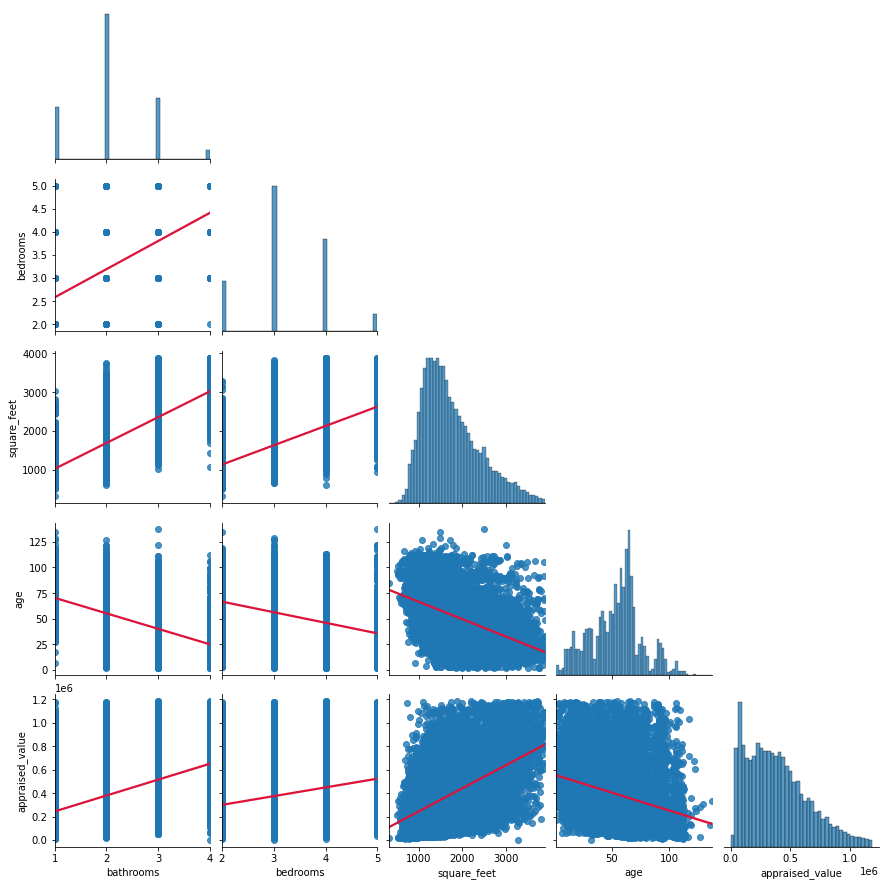

In [56]:
plot_variable_pairs(train)

#### Takeaways

### Statistical Testing

#### Correlation Test: Does the number of bathrooms affect the appraised value?

- The heatmap shows this category has a high positive correlation.

Form hypothesis:

- $H_0$ The number of bathrooms has no affect on the appraised value (independent)
- $H_a$ The number of bathrooms does have an affect on appraised value (dependent)

In [57]:
corr, p = stats.pearsonr(train.bathrooms, train.appraised_value)
print(corr, p)

# set alpha
alpha = 0.05

null_hypothesis = "the number of the bathrooms has no affect on the appraised value."

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')

0.38868892326661064 0.0

We can reject the null hypothesis that the number of the bathrooms has no affect on the appraised value.


#### T-Test: Does the square footage of the property affect the appraised value?

- The median value of square_feet is ~1600 sq.ft.
- The heatmap shows this category has a highest positive correlation.

Form hypothesis:

- $H_0$ The average appraised value of properties with 1600 sq.ft. or more is equal to the average appraised value of properties with 1600 sq.ft or less.
- $H_a$ The average appraised value of properties with 1600 sq.ft. or more is higher than the average appraised value of properties with 1600 sq.ft or less.

In [58]:
sqft_less_than_1600 = train[train.square_feet <= 1600]
sqft_more_than_1600 = train[train.square_feet > 1600]

# a = sqft_less_than_1600.appraised_value.mean()
# b = sqft_more_than_1600.appraised_value.mean()

t, p = stats.ttest_ind(sqft_more_than_1600.appraised_value, sqft_less_than_1600.appraised_value)
print(t, p)

# set alpha
alpha = 0.05

null_hypothesis = "the average appraised value of properties with 1600 sq.ft. or more is equal to the average appraised value of properties with 1600 sq.ft or less."

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')

48.50374026487064 0.0

We can reject the null hypothesis that the average appraised value of properties with 1600 sq.ft. or more is equal to the average appraised value of properties with 1600 sq.ft or less.


## Modeling

#### Establish a baseline

In [59]:
y_train = pd.DataFrame({'actual': y_train})
y_train['baseline'] = y_train.actual.mean()
y_train.head()

,actual,baseline
parcelid,,
12071196,822304,393692.212169
14274491,599000,393692.212169
12825849,364079,393692.212169
12445221,514602,393692.212169
17146152,650523,393692.212169


In [60]:
y_validate = pd.DataFrame({'actual': y_validate})
y_validate['baseline'] = y_train.actual.mean()
y_validate.head()

,actual,baseline
parcelid,,
14464878,1009000,393692.212169
11245027,106195,393692.212169
14242162,136891,393692.212169
11984470,1025695,393692.212169
10900406,784502,393692.212169


In [61]:
print('Train RMSE Baseline model:', math.sqrt(mean_squared_error(y_train.actual, y_train.baseline)))
rmse_baseline = math.sqrt(mean_squared_error(y_validate.actual, y_validate.baseline))
print('Validate RMSE baseline:', rmse_baseline)

Train RMSE Baseline model: 258931.76560414536
Validate RMSE baseline: 253998.06691963325


In [62]:
metric_df = pd.DataFrame(data=[{'model': 'mean_baseline', 'rmse_validate': rmse_baseline,
    'r^2_validate': explained_variance_score(y_validate.actual, y_validate.baseline)}])
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,253998.06692,0.0


#### Model1 - OLS (LinearRegression)

In [63]:
# create the model
model1 = LinearRegression(normalize=True)
# fit the model
model1.fit(X_train_scaled, y_train.actual)
# use the model to make predictions
y_train['model1'] = model1.predict(X_train_scaled)
y_validate['model1'] = model1.predict(X_validate_scaled)

print('Train RMSE for model1:', math.sqrt(mean_squared_error(y_train.actual, y_train.model1)))

rmse_model1 = math.sqrt(mean_squared_error(y_validate.actual, y_validate.model1))
print('Validate RMSE model1:', rmse_model1)

Train RMSE for model1: 223063.17208168618
Validate RMSE model1: 223095.65294493307


In [64]:
metric_df = metric_df.append({'model': 'model1', 'rmse_validate': rmse_model1,
    'r^2_validate': explained_variance_score(y_validate.actual, y_validate.model1)}, ignore_index=True)
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,253998.066920,0.000000
1,model1,223095.652945,0.227936


#### Model2 - LassoLars

In [65]:
# create the model
model2 = LassoLars(alpha=1)
# fit the model
model2.fit(X_train_scaled, y_train.actual)
# use the model to make predictions
y_train['model2'] = model2.predict(X_train_scaled)
y_validate['model2'] = model2.predict(X_validate_scaled)

print('Train RMSE for model2:', math.sqrt(mean_squared_error(y_train.actual, y_train.model2)))

rmse_model2 = math.sqrt(mean_squared_error(y_validate.actual, y_validate.model2))
print('Validate RMSE model2:', rmse_model2)

Train RMSE for model2: 223063.36376190305
Validate RMSE model2: 223080.17974962742


In [66]:
metric_df = metric_df.append({'model': 'model2', 'rmse_validate': rmse_model2,
    'r^2_validate': explained_variance_score(y_validate.actual, y_validate.model2)}, ignore_index=True)
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,253998.066920,0.000000
1,model1,223095.652945,0.227936
2,model2,223080.179750,0.228043


#### Model3 - TweedieRegressor (GLM)

In [67]:
# create the model
model3 = TweedieRegressor(power=1, alpha=0)
# fit the model
model3.fit(X_train_scaled, y_train.actual)
# use the model to make predictions
y_train['model3'] = model3.predict(X_train_scaled)
y_validate['model3'] = model3.predict(X_validate_scaled)

print('Train RMSE for model3:', math.sqrt(mean_squared_error(y_train.actual, y_train.model3)))

rmse_model3 = math.sqrt(mean_squared_error(y_validate.actual, y_validate.model3))
print('Validate RMSE model3:', rmse_model3)

Train RMSE for model3: 223414.93675605417
Validate RMSE model3: 223579.1858048459


In [68]:
metric_df = metric_df.append({'model': 'model3', 'rmse_validate': rmse_model3,
    'r^2_validate': explained_variance_score(y_validate.actual, y_validate.model3)}, ignore_index=True)
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,253998.066920,0.000000
1,model1,223095.652945,0.227936
2,model2,223080.179750,0.228043
3,model3,223579.185805,0.224607


In [69]:
print('Train RMSE Baseline model:', math.sqrt(mean_squared_error(y_train.actual, y_train.baseline)))
print('Validate RMSE baseline:', rmse_baseline)
print('-------------------------------------------')
print('Train RMSE for model1:', math.sqrt(mean_squared_error(y_train.actual, y_train.model1)))
print('Validate RMSE model1:', rmse_model1)
print('-------------------------------------------')
print('Train RMSE for model2:', math.sqrt(mean_squared_error(y_train.actual, y_train.model2)))
print('Validate RMSE model2:', rmse_model2)
print('-------------------------------------------')
print('Train RMSE for model3:', math.sqrt(mean_squared_error(y_train.actual, y_train.model3)))
print('Validate RMSE model3:', rmse_model3)
print('-------------------------------------------')

Train RMSE Baseline model: 258931.76560414536
Validate RMSE baseline: 253998.06691963325
-------------------------------------------
Train RMSE for model1: 223063.17208168618
Validate RMSE model1: 223095.65294493307
-------------------------------------------
Train RMSE for model2: 223063.36376190305
Validate RMSE model2: 223080.17974962742
-------------------------------------------
Train RMSE for model3: 223414.93675605417
Validate RMSE model3: 223579.1858048459
-------------------------------------------


#### Best Model - LassoLars

In [70]:
y_test = pd.DataFrame({'actual': y_test})
# use the model to make predictions
y_test['model2'] = model2.predict(X_test_scaled)

print('Test RMSE for model2:', math.sqrt(mean_squared_error(y_test.actual, y_test.model2)))
print('r^2_test:', explained_variance_score(y_test.actual, y_test.model2))

Test RMSE for model2: 226542.74556106445
r^2_test: 0.22001885821228218


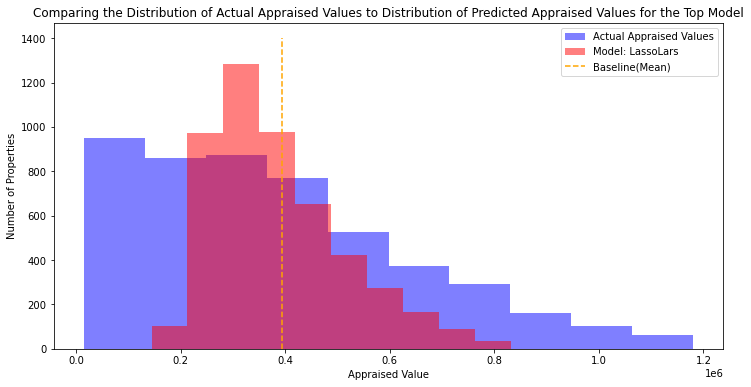

In [71]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(12,6))
plt.hist(y_test.actual, color='blue', alpha=.5, label="Actual Appraised Values")
plt.vlines(y_train.actual.mean(), 0, 1400, ls='--', color='orange', label='Baseline(Mean)')
# plt.hist(y_validate.model1, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_test.model2, color='red', alpha=.5, label='Model: LassoLars')
# plt.hist(y_validate.model3, color='green', alpha=.5, label="Model: TweedieRegressor(GLM)")
plt.xlabel("Appraised Value")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Appraised Values to Distribution of Predicted Appraised Values for the Top Model")
plt.legend()
# plt.savefig('chart.png', facecolor='white')
plt.show()

## Tax Rate Distribution

In [72]:
# Calculate the tax rate and add it as a column
df['tax_rate'] = (df['taxes'] / df['appraised_value'])
df.head()

,bathrooms,bedrooms,square_feet,county_code,age,appraised_value,taxes,tax_rate
parcelid,,,,,,,,
11721753,2,3,1316,6037,94,205123,2627.48,0.012809
11289917,2,3,1458,6037,47,136104,2319.90,0.017045
11705026,1,2,1421,6037,106,35606,543.69,0.015270
14269464,3,4,2541,6059,14,880456,9819.72,0.011153
11446756,2,3,1491,6037,62,107110,1399.27,0.013064


In [73]:
# Add the name of the county based on the FIPS numbers from the db
df['county_name'] = df['county_code'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})
df.head()

,bathrooms,bedrooms,square_feet,county_code,age,appraised_value,taxes,tax_rate,county_name
parcelid,,,,,,,,,
11721753,2,3,1316,6037,94,205123,2627.48,0.012809,Los Angeles
11289917,2,3,1458,6037,47,136104,2319.90,0.017045,Los Angeles
11705026,1,2,1421,6037,106,35606,543.69,0.015270,Los Angeles
14269464,3,4,2541,6059,14,880456,9819.72,0.011153,Orange
11446756,2,3,1491,6037,62,107110,1399.27,0.013064,Los Angeles


In [74]:
# The FIPS code shows that the data is based on 3 counties in Southern California: Los Angeles, Orange, and Ventura 
df.county_name.value_counts()

Los Angeles    15842
Orange          6807
Ventura         2239
Name: county_name, dtype: int64

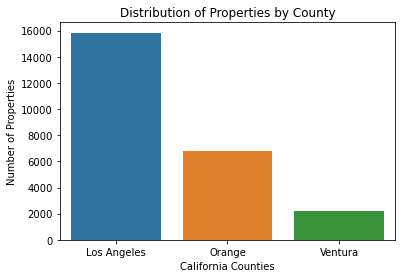

In [75]:
# quick viz of properties by county
plt.title('Distribution of Properties by County')
sns.countplot(df.county_name)
plt.xlabel('California Counties')
plt.ylabel('Number of Properties')
plt.show()

In [76]:
print(df.groupby('county_name').tax_rate.mean())

county_name
Los Angeles    0.014252
Orange         0.012151
Ventura        0.011876
Name: tax_rate, dtype: float64


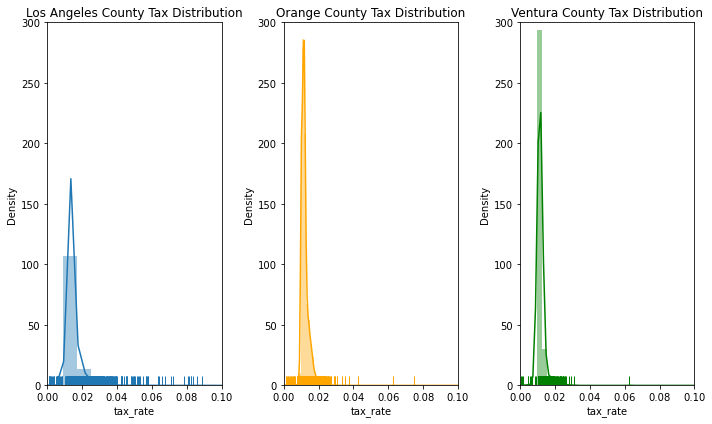

In [77]:
# visualization showing side-by-side comparison of county tax rate

plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
sns.distplot(df[df.county_code==6037].tax_rate, bins=100, kde=True, rug=True)
plt.xlim(0, .10)
plt.ylim(0, 300)
plt.title("Los Angeles County Tax Distribution")

plt.subplot(1,3,2)
sns.distplot(df[df.county_code==6059].tax_rate, bins=100, kde=True, rug=True, color='orange')
plt.xlim(0, .10)
plt.ylim(0, 300)
plt.title("Orange County Tax Distribution")

plt.subplot(1,3,3)
sns.distplot(df[df.county_code==6111].tax_rate, bins=100, kde=True, rug=True, color='green')
plt.xlim(0, .10)
plt.ylim(0, 300)
plt.title("Ventura County Tax Distribution")

plt.tight_layout()

plt.show()

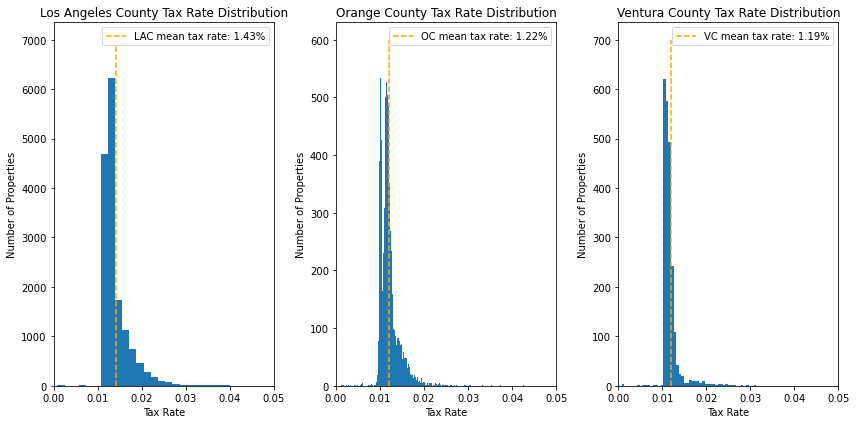

In [83]:
# visualization showing side-by-side comparison of county tax rate

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title('Los Angeles County Tax Rate Distribution')
plt.hist(df[df.county_code==6037].tax_rate, bins=500)
plt.vlines(df[df.county_code==6037].tax_rate.mean(), 0, 7000, ls='--', color='orange', label='LAC mean tax rate: 1.43%')
plt.xlabel('Tax Rate')
plt.ylabel('Number of Properties')
plt.xlim(0.0, 0.05)
plt.legend()

plt.subplot(1,3,2)
plt.title('Orange County Tax Rate Distribution')
plt.hist(df[df.county_code==6059].tax_rate, bins=500)
plt.vlines(df[df.county_code==6059].tax_rate.mean(), 0, 600, ls='--', color='orange', label='OC mean tax rate: 1.22%')
plt.xlabel('Tax Rate')
plt.ylabel('Number of Properties')
plt.xlim(0.0, 0.05)
plt.legend()

plt.subplot(1,3,3)
plt.title('Ventura County Tax Rate Distribution')
plt.hist(df[df.county_code==6111].tax_rate, bins=500)
plt.vlines(df[df.county_code==6111].tax_rate.mean(), 0, 700, ls='--', color='orange', label='VC mean tax rate: 1.19%')
plt.xlabel('Tax Rate')
plt.ylabel('Number of Properties')
plt.xlim(0.0, 0.05)
plt.legend()

plt.tight_layout()
plt.savefig('tax_chart.png', facecolor='white')
plt.show()